## Pandas Test

### 链接两个相同行数的表（例如label表和features表）

In [1]:
import pandas as pd
import numpy as np

In [2]:
label_table=pd.DataFrame(np.random.rand(10,1),columns=['label'])
feature_table = pd.DataFrame(np.random.rand(10,4),columns=['f1','f2','f3','f4'])
print(label_table)
print(feature_table)

      label
0  0.185734
1  0.647367
2  0.174621
3  0.257502
4  0.389819
5  0.476261
6  0.330086
7  0.225495
8  0.727909
9  0.549237
         f1        f2        f3        f4
0  0.751132  0.641477  0.376623  0.054930
1  0.687988  0.412384  0.728187  0.643134
2  0.424185  0.494683  0.562796  0.593922
3  0.633546  0.137621  0.053600  0.818768
4  0.755681  0.140346  0.127013  0.721672
5  0.118268  0.097124  0.087094  0.659349
6  0.302759  0.851649  0.868094  0.717360
7  0.913430  0.929036  0.979687  0.077669
8  0.755536  0.445949  0.832603  0.601714
9  0.607093  0.167967  0.398167  0.139375


In [3]:
#concat
pd.concat([label_table,feature_table],axis=1)
# 满足我的要求

,label,f1,f2,f3,f4
0,0.185734,0.751132,0.641477,0.376623,0.054930
1,0.647367,0.687988,0.412384,0.728187,0.643134
2,0.174621,0.424185,0.494683,0.562796,0.593922
3,0.257502,0.633546,0.137621,0.053600,0.818768
4,0.389819,0.755681,0.140346,0.127013,0.721672
5,0.476261,0.118268,0.097124,0.087094,0.659349
6,0.330086,0.302759,0.851649,0.868094,0.717360
7,0.225495,0.913430,0.929036,0.979687,0.077669
8,0.727909,0.755536,0.445949,0.832603,0.601714
9,0.549237,0.607093,0.167967,0.398167,0.139375


### 链接具有相同列的表

- 读取两个csv文件
- 将每个文件中的两列组合起来成为一列
- 根据新组合的一列进行表的merge
- 将数据进行归一化

In [44]:
import glob

files = glob.glob('./demo_data/*csv')
print(files)

['./demo_data/twopoolmerge.csv', './demo_data/6.csv', './demo_data/7.csv', './demo_data/5.csv', './demo_data/4.csv', './demo_data/statOfPercentage.csv', './demo_data/3.csv', './demo_data/22.csv', './demo_data/20.csv', './demo_data/21.csv', './demo_data/19.csv', './demo_data/18.csv', './demo_data/NW_003571040.1_PRSS2.csv', './demo_data/16.csv', './demo_data/17.csv', './demo_data/15.csv', './demo_data/14.csv', './demo_data/statOfPercentage_dif_region_gene.csv', './demo_data/10.csv', './demo_data/11.csv', './demo_data/13.csv', './demo_data/12.csv', './demo_data/X.csv', './demo_data/9.csv', './demo_data/8.csv', './demo_data/Y.csv', './demo_data/MT.csv', './demo_data/onePool.csv']


In [45]:
test1 = pd.read_csv(files[0])
test2 = pd.read_csv(files[0])

print(test1.head())
print(test2.head())

   Unnamed: 0                  loc    pool     depth
0           0  1:25869948-25870206  POOL=1  0.188543
1           1  1:25870150-25870363  POOL=2  0.115090
2           2  1:25870279-25870528  POOL=1  0.062671
3           3  1:25870470-25870655  POOL=2  0.000000
4           4  1:25870632-25870906  POOL=1  0.306823
   Unnamed: 0                  loc    pool     depth
0           0  1:25869948-25870206  POOL=1  0.188543
1           1  1:25870150-25870363  POOL=2  0.115090
2           2  1:25870279-25870528  POOL=1  0.062671
3           3  1:25870470-25870655  POOL=2  0.000000
4           4  1:25870632-25870906  POOL=1  0.306823


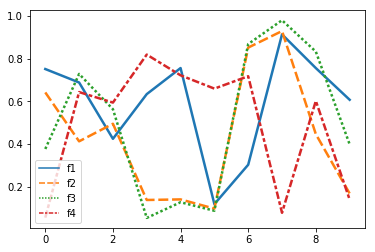

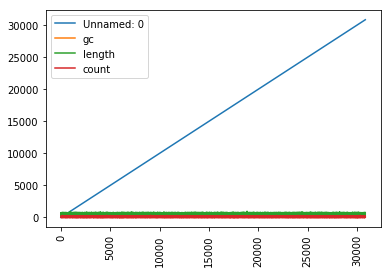

In [41]:
%matplotlib inline
import seaborn as sns
sns.lineplot(data=feature_table, palette="tab10", linewidth=2.5)
test1.plot(kind='line',use_index=True,rot=90)

                      depth_a   depth_b
loc                                    
1:25869948-25870206  0.188543  0.188543
1:25869948-25870206  0.188543  0.044222
1:25869948-25870206  0.188543  0.092387
1:25869948-25870206  0.188543  0.039263
1:25869948-25870206  0.188543  0.070549


AttributeError: Unknown property font

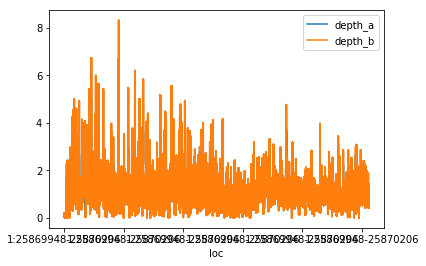

In [50]:
merge_data = pd.merge(test1[['loc','depth']],test2[['loc','depth']],on='loc',how='outer',suffixes=['_a','_b']).fillna(0)
merge_data.set_index('loc',inplace=True)
print(merge_data.head())


[Text(0,0,'1:25869948-25870206'),
 Text(0,0,'1:25869948-25870206'),
 Text(0,0,'1:25869948-25870206'),
 Text(0,0,'1:25869948-25870206'),
 Text(0,0,'1:25869948-25870206'),
 Text(0,0,'1:25869948-25870206'),
 Text(0,0,'1:25869948-25870206'),
 Text(0,0,'1:25869948-25870206')]

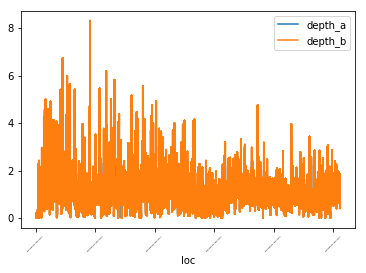

In [51]:
a=merge_data.plot(use_index=True)
a.set_xticklabels(merge_data.index,rotation=45,fontsize=2)

In [8]:
merge_data = (merge_data-merge_data.mean())/(merge_data.max()-merge_data.min())
print(merge_data.head())

         count_a   count_b
idx                       
33-440  0.185371  0.169462
87-229 -0.075366 -0.076784
51-671 -0.069231 -0.073781
20-162 -0.072298 -0.076784
42-294  0.510524  0.493786


## 找出一列中uniq的类型，然后进行统计


In [9]:
pd_data = pd.read_csv('demo_data/CG.txt',sep='\t')
for tp in pd_data['type'].unique():
    print(pd_data[pd_data['type'] == tp]['depth'])

0     27
1     25
2     71
3     57
4     53
5     55
6     89
7     98
8     63
9      2
10    60
11    12
12    23
Name: depth, dtype: int64
13    30
14    89
15    24
16    77
17    18
18    63
19    68
20    37
21    49
22    90
23    18
24     0
25     0
26    69
Name: depth, dtype: int64
27    11
28    28
29    36
30    29
31    30
32    97
33    80
34    45
35    93
Name: depth, dtype: int64
36    50
37    50
38    79
39    87
40    46
41    86
42    84
43    60
44    22
45    42
46    43
47    96
48    63
49    63
50    59
51     2
52    21
53    32
54    21
55    18
56    79
57    98
58    94
Name: depth, dtype: int64
